MIT License

Copyright (c) 2024 Mohammed Yasin

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

> **WARNING**
>
> Don't use "Run All". Run the cells one after another manually.

# Install patched Ultralytics

In [ ]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 76864, done.
remote: Counting objects: 100% (574/574), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 76864 (delta 511), reused 381 (delta 381), pack-reused 76290 (from 4)
Receiving objects: 100% (76864/76864), 41.11 MiB | 10.25 MiB/s, done.
Resolving deltas: 100% (57744/57744), done.


In [ ]:
%cd /content/ultralytics

/content/ultralytics


In [ ]:
!git reset --hard 6806f15396432fffb951250d650454b840eb4c28

HEAD is now at 6806f1539 Fix `model.end2end` assert (#17391)


In [ ]:
# Download patch
!wget https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/f8e9ba1644cbfa86295f14fbe26c3d91a504b155/add_head.patch

--2025-12-07 12:26:29--  https://gist.githubusercontent.com/Y-T-G/8f4fc0b78a0a559a06fe84ae4f359e6e/raw/f8e9ba1644cbfa86295f14fbe26c3d91a504b155/add_head.patch
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11324 (11K) [text/plain]
Saving to: ‘add_head.patch’

add_head.patch      100%[===================>]  11.06K  --.-KB/s    in 0s      

2025-12-07 12:26:29 (110 MB/s) - ‘add_head.patch’ saved [11324/11324]



In [ ]:
!git apply add_head.patch

In [ ]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.28-0.editable-py3-none-any.whl size=22721 sha256=4c5f9a6e8450a6bcc573b00773f1f78c9b0d6dd7e8d2510cf630d18708fb9e4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-sqed688w/wheels/60/e0/59/e2f034f296abbdca5c21e3f5be76b9ca685f13c7bd17f8b58c
Successfully built ultralytics


# Download dataset

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 125.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ii5jzcz9HVtHYOfLVGZk")
project = rf.workspace("yolov8-for-person-car-dog-red-ball-box").project("final-dataset-2pzbf")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Final-dataset-1 in yolov8:: 100%|██████████| 22748/22748 [00:02<00:00, 8865.04it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!mkdir -p /content/datasets/Project-1
!mv /content/ultralytics/Final-dataset-1/** /content/datasets/Project-1
!mv /content/datasets/Project-1/data.yaml /content/datasets

# Train a model with frozen COCO backbone

In [ ]:
# Reset runtime
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

# Wait for restart and then continue

{'status': 'ok', 'restart': True}

> **WARNING**
>
> Wait for the Colab kernel to crash and restart after running the above cell, before continuing.

In [ ]:
%cd /content/ultralytics

/content/ultralytics


In [ ]:
from ultralytics import YOLO
import torch
import copy

In [ ]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.25M/6.25M [00:00<00:00, 76.5MB/s]


In [ ]:
# Keep a copy of old state dict for sanity check
old_dict = copy.deepcopy(model.state_dict())

In [ ]:
# We should freeze all but the last layer
model.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.bn.weight', 'model.model.0.bn.bias', 'model.model.0.bn.running_mean', 'model.model.0.bn.running_var', 'model.model.0.bn.num_batches_tracked', 'model.model.1.conv.weight', 'model.model.1.bn.weight', 'model.model.1.bn.bias', 'model.model.1.bn.running_mean', 'model.model.1.bn.running_var', 'model.model.1.bn.num_batches_tracked', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.bn.weight', 'model.model.2.cv1.bn.bias', 'model.model.2.cv1.bn.running_mean', 'model.model.2.cv1.bn.running_var', 'model.model.2.cv1.bn.num_batches_tracked', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.bn.weight', 'model.model.2.cv2.bn.bias', 'model.model.2.cv2.bn.running_mean', 'model.model.2.cv2.bn.running_var', 'model.model.2.cv2.bn.num_batches_tracked', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.bn.weight', 'model.model.2.m.0.cv1.bn.bias', 'model.model.2.m.0.cv1.bn.running_mean', 'model.model.2.m.0.cv1.bn.running_var', 'model.mod

In [ ]:
# Add a callback to put the frozen layers in eval mode to prevent BN values
# from changing.
def put_in_eval_mode(trainer, n_layers=22):
  for i, (name, module) in enumerate(trainer.model.named_modules()):
    if name.endswith("bn") and int(name.split('.')[1]) < n_layers:
      module.eval()
      module.track_running_stats = False
      # print(name, " put in eval mode.")

In [ ]:
model.add_callback("on_train_epoch_start", put_in_eval_mode)
model.add_callback("on_pretrain_routine_start", put_in_eval_mode)

In [ ]:
# Train the model. Freeze the first 22 layers [0-21].
results = model.train(data='/content/datasets/data.yaml', freeze=22, epochs=100, imgsz=320, batch=32)

New https://pypi.org/project/ultralytics/8.3.235 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.28 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=22, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Project-1/train/labels... 10617 images, 570 backgrounds, 0 corrupt: 100%|██████████| 10617/10617 [00:04<00:00, 2438.04it/s]


train: New cache created: /content/datasets/Project-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 195, len(boxes) = 40050. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/ultralytics/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/datasets/Project-1/valid/labels... 426 images, 58 backgrounds, 0 corrupt: 100%|██████████| 426/426 [00:00<00:00, 1263.59it/s]

val: New cache created: /content/datasets/Project-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 1647. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/ultralytics/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.596G      1.369      1.957      1.349         95        320: 100%|██████████| 332/332 [01:01<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        426       1647      0.593      0.537      0.551      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.501G      1.351      1.415      1.316        114        320: 100%|██████████| 332/332 [00:58<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]


                   all        426       1647      0.671      0.589      0.628      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.528G      1.364      1.333       1.31        202        320: 100%|██████████| 332/332 [00:58<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]


                   all        426       1647      0.684      0.564      0.621       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.531G      1.389      1.295      1.324        176        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]


                   all        426       1647      0.682       0.65      0.688      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.484G      1.354      1.237      1.301        132        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.88it/s]


                   all        426       1647      0.761      0.585      0.674      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.489G      1.338      1.202      1.299        133        320: 100%|██████████| 332/332 [00:57<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.60it/s]

                   all        426       1647      0.723      0.624      0.694      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.541G      1.319      1.188      1.296        175        320: 100%|██████████| 332/332 [00:57<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        426       1647       0.76      0.621      0.713      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      0.57G      1.313      1.159      1.287        166        320: 100%|██████████| 332/332 [01:00<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.72it/s]

                   all        426       1647      0.781      0.679      0.756      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.537G      1.303      1.152      1.279        189        320: 100%|██████████| 332/332 [00:57<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]


                   all        426       1647      0.765      0.661      0.726      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      0.52G      1.294      1.141      1.276        147        320: 100%|██████████| 332/332 [00:59<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]


                   all        426       1647      0.768      0.689      0.756      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.522G      1.291      1.132      1.276         87        320: 100%|██████████| 332/332 [00:56<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        426       1647      0.763      0.706      0.756       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.512G      1.286      1.133      1.278        201        320: 100%|██████████| 332/332 [00:56<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]

                   all        426       1647      0.757      0.673       0.74      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.468G      1.274      1.115       1.27        156        320: 100%|██████████| 332/332 [00:57<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


                   all        426       1647      0.777      0.714      0.766      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      0.51G      1.273      1.105      1.268        138        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]

                   all        426       1647      0.788      0.701      0.765       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      0.57G      1.265      1.101      1.263        182        320: 100%|██████████| 332/332 [00:58<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        426       1647      0.785      0.701      0.759      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.457G      1.267      1.096      1.263        165        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        426       1647      0.802      0.699      0.765      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.589G      1.256      1.092      1.259        159        320: 100%|██████████| 332/332 [00:57<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.71it/s]


                   all        426       1647      0.799      0.715      0.784      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.501G      1.267      1.094      1.265        138        320: 100%|██████████| 332/332 [00:58<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.68it/s]


                   all        426       1647      0.814      0.726      0.788      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.575G      1.255      1.082      1.258        152        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]

                   all        426       1647      0.811      0.703      0.781      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.501G      1.253      1.076      1.251        135        320: 100%|██████████| 332/332 [00:57<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.66it/s]


                   all        426       1647      0.809      0.721      0.781      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      0.56G      1.253      1.082      1.258        157        320: 100%|██████████| 332/332 [00:57<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.42it/s]

                   all        426       1647      0.792      0.717      0.778      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.528G      1.243      1.068       1.25        141        320: 100%|██████████| 332/332 [00:56<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all        426       1647      0.802      0.734      0.782      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.539G      1.243      1.065      1.252        154        320: 100%|██████████| 332/332 [00:57<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]


                   all        426       1647      0.809      0.724      0.791      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.495G      1.242      1.057      1.249        160        320: 100%|██████████| 332/332 [00:56<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]

                   all        426       1647      0.827      0.703      0.788      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.482G      1.242      1.063      1.251        152        320: 100%|██████████| 332/332 [00:57<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]


                   all        426       1647      0.837      0.706      0.791      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.484G      1.243      1.061      1.253        152        320: 100%|██████████| 332/332 [00:56<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        426       1647      0.806      0.716      0.794      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.539G      1.239      1.068      1.253        145        320: 100%|██████████| 332/332 [00:56<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]


                   all        426       1647      0.809      0.733      0.799      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.558G      1.238       1.06      1.248        155        320: 100%|██████████| 332/332 [00:57<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.81it/s]

                   all        426       1647      0.808      0.727      0.783      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.457G      1.231      1.056      1.248        157        320: 100%|██████████| 332/332 [00:56<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]


                   all        426       1647      0.825      0.721      0.796      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.581G      1.226       1.04      1.245        168        320: 100%|██████████| 332/332 [00:57<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]

                   all        426       1647      0.818      0.733      0.795      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      0.52G      1.239      1.055      1.248        113        320: 100%|██████████| 332/332 [00:56<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.03it/s]

                   all        426       1647      0.822      0.725      0.796      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.522G       1.23       1.05      1.245        165        320: 100%|██████████| 332/332 [00:56<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]


                   all        426       1647      0.833      0.713      0.796      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.516G       1.23      1.051      1.248        202        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


                   all        426       1647      0.802      0.738      0.799      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.476G      1.227      1.045      1.245        176        320: 100%|██████████| 332/332 [00:56<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]


                   all        426       1647       0.82      0.712      0.788      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.518G      1.227      1.041      1.245        126        320: 100%|██████████| 332/332 [00:57<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]


                   all        426       1647      0.823      0.725      0.792       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.495G       1.22      1.034       1.24        131        320: 100%|██████████| 332/332 [00:57<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        426       1647      0.826      0.722      0.797      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      0.47G      1.229      1.037       1.24        158        320: 100%|██████████| 332/332 [00:56<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        426       1647      0.825      0.718      0.801      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.627G      1.218      1.032      1.237        124        320: 100%|██████████| 332/332 [00:57<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]

                   all        426       1647      0.811      0.733      0.807      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      0.52G      1.211      1.031      1.237        197        320: 100%|██████████| 332/332 [00:56<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.69it/s]


                   all        426       1647      0.817      0.733      0.806      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.522G      1.222      1.034      1.239        141        320: 100%|██████████| 332/332 [00:57<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]


                   all        426       1647      0.808      0.725      0.796      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.579G      1.225      1.031      1.239        117        320: 100%|██████████| 332/332 [00:57<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        426       1647      0.812      0.738      0.808      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.505G      1.217      1.036      1.241        187        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]


                   all        426       1647      0.815      0.745       0.81      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.596G      1.212      1.029      1.237        128        320: 100%|██████████| 332/332 [00:58<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        426       1647      0.818      0.742      0.813      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.583G      1.226      1.031      1.242        157        320: 100%|██████████| 332/332 [00:56<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]


                   all        426       1647      0.805      0.759      0.813      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.575G      1.211      1.022      1.235        121        320: 100%|██████████| 332/332 [00:58<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        426       1647      0.823      0.745      0.812      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.535G      1.217      1.029      1.234        139        320: 100%|██████████| 332/332 [00:57<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]


                   all        426       1647      0.791      0.758      0.813      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.566G      1.207      1.022      1.232        132        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]

                   all        426       1647      0.821      0.742      0.812      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.579G       1.21      1.017      1.231        195        320: 100%|██████████| 332/332 [00:58<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]

                   all        426       1647      0.825      0.745      0.815      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.537G      1.206       1.02      1.232        148        320: 100%|██████████| 332/332 [00:56<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.48it/s]

                   all        426       1647      0.819      0.739      0.813      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.562G      1.201      1.015      1.228        170        320: 100%|██████████| 332/332 [00:57<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        426       1647      0.817      0.751      0.814      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.524G      1.215      1.019      1.238        120        320: 100%|██████████| 332/332 [00:58<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.58it/s]

                   all        426       1647      0.814      0.761      0.818      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.608G      1.215      1.024      1.233        169        320: 100%|██████████| 332/332 [00:56<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]


                   all        426       1647      0.822       0.74      0.813      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.583G      1.199      1.018      1.229        136        320: 100%|██████████| 332/332 [00:58<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]


                   all        426       1647      0.849      0.741      0.819      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.585G      1.201      1.012       1.23        180        320: 100%|██████████| 332/332 [00:58<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.22it/s]


                   all        426       1647      0.836      0.746       0.82      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       0.6G      1.208      1.014      1.232        173        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.01it/s]


                   all        426       1647      0.835      0.741      0.817       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.545G        1.2      1.004      1.226        148        320: 100%|██████████| 332/332 [00:58<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]


                   all        426       1647       0.84      0.743      0.821      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.556G      1.203      1.014       1.23        142        320: 100%|██████████| 332/332 [00:57<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]

                   all        426       1647      0.842      0.735      0.815      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.543G      1.202      1.009      1.231        141        320: 100%|██████████| 332/332 [00:57<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]


                   all        426       1647      0.826      0.742      0.816       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.514G      1.203      1.006       1.23        165        320: 100%|██████████| 332/332 [00:58<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.96it/s]

                   all        426       1647      0.839      0.743      0.819      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.541G      1.201      1.006      1.228        154        320: 100%|██████████| 332/332 [00:57<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.75it/s]

                   all        426       1647      0.845      0.731      0.816      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.564G      1.199      1.004      1.227        128        320: 100%|██████████| 332/332 [00:58<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        426       1647      0.824      0.738      0.816       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.514G      1.202      1.008      1.229        162        320: 100%|██████████| 332/332 [00:57<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        426       1647      0.814      0.753      0.817      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.543G      1.194      1.008      1.223        110        320: 100%|██████████| 332/332 [00:56<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.73it/s]

                   all        426       1647      0.841      0.736      0.818      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.482G      1.193      1.007      1.227        146        320: 100%|██████████| 332/332 [00:58<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]


                   all        426       1647      0.832      0.743      0.819      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.558G       1.19      1.003      1.226        161        320: 100%|██████████| 332/332 [00:57<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        426       1647      0.832       0.74      0.821       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.508G      1.195     0.9988      1.223        165        320: 100%|██████████| 332/332 [00:57<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]


                   all        426       1647      0.828      0.743      0.819       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.487G      1.197      1.004      1.225        111        320: 100%|██████████| 332/332 [00:57<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


                   all        426       1647       0.83      0.744       0.82      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      0.51G      1.196      1.001      1.227        165        320: 100%|██████████| 332/332 [00:57<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.93it/s]


                   all        426       1647      0.826      0.746      0.823      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.503G      1.187     0.9914      1.222        157        320: 100%|██████████| 332/332 [00:58<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.63it/s]


                   all        426       1647      0.836      0.747      0.823      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.545G      1.191     0.9966      1.221        189        320: 100%|██████████| 332/332 [00:56<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.95it/s]

                   all        426       1647      0.834      0.748      0.822      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.562G      1.191      1.001      1.222        157        320: 100%|██████████| 332/332 [00:57<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.90it/s]

                   all        426       1647       0.83      0.754      0.823      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.518G      1.188     0.9907      1.222        134        320: 100%|██████████| 332/332 [00:57<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        426       1647      0.835      0.745      0.823      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.528G      1.199      1.005      1.231        160        320: 100%|██████████| 332/332 [00:56<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.84it/s]

                   all        426       1647      0.834       0.75      0.822      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.671G      1.182     0.9933      1.216        117        320: 100%|██████████| 332/332 [00:57<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]

                   all        426       1647       0.83      0.751       0.82      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.522G      1.187     0.9976      1.224        165        320: 100%|██████████| 332/332 [00:56<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        426       1647      0.838      0.746      0.824      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.539G      1.179     0.9875      1.217        106        320: 100%|██████████| 332/332 [00:56<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        426       1647      0.831      0.748      0.823      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.508G      1.185     0.9963      1.223        119        320: 100%|██████████| 332/332 [00:57<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        426       1647      0.829      0.747      0.822      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.552G      1.181     0.9797      1.217        190        320: 100%|██████████| 332/332 [00:56<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        426       1647       0.84      0.745      0.824      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.566G      1.183     0.9841      1.219        224        320: 100%|██████████| 332/332 [00:57<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.89it/s]

                   all        426       1647      0.834      0.742      0.823      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.528G      1.183     0.9916      1.222        202        320: 100%|██████████| 332/332 [00:56<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        426       1647      0.835      0.745      0.822      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.514G      1.174     0.9763      1.214        164        320: 100%|██████████| 332/332 [00:56<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.78it/s]


                   all        426       1647      0.827      0.747      0.823      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.558G      1.178     0.9843       1.22        162        320: 100%|██████████| 332/332 [00:57<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.44it/s]


                   all        426       1647      0.824      0.754      0.821      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      0.51G      1.177     0.9786      1.215        194        320: 100%|██████████| 332/332 [00:56<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.85it/s]

                   all        426       1647      0.824      0.752      0.821      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.646G      1.187     0.9846      1.216        127        320: 100%|██████████| 332/332 [00:57<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        426       1647       0.82      0.755      0.821      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      0.51G      1.178     0.9839      1.218        133        320: 100%|██████████| 332/332 [00:56<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        426       1647      0.827      0.757      0.821      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.497G      1.172     0.9781      1.214        158        320: 100%|██████████| 332/332 [00:56<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.94it/s]


                   all        426       1647      0.829      0.756      0.822      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      0.56G      1.182     0.9737      1.216        187        320: 100%|██████████| 332/332 [00:58<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.70it/s]


                   all        426       1647      0.828       0.76      0.823      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.575G      1.177     0.9786      1.218        104        320: 100%|██████████| 332/332 [00:56<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]

                   all        426       1647      0.827       0.76      0.823      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.503G      1.179     0.9768      1.218        139        320: 100%|██████████| 332/332 [00:58<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.92it/s]

                   all        426       1647      0.827      0.761      0.824      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.556G      1.168     0.9747      1.213        152        320: 100%|██████████| 332/332 [00:57<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

                   all        426       1647       0.83      0.759      0.825      0.518


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/ultralytics/ultralytics/data/augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.409G      1.235     0.8758      1.236         85        320: 100%|██████████| 332/332 [00:55<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.00it/s]


                   all        426       1647      0.828       0.76      0.824      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.422G      1.233     0.8647      1.234         74        320: 100%|██████████| 332/332 [00:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.09it/s]

                   all        426       1647      0.832      0.757      0.825      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.388G       1.23     0.8593      1.229         85        320: 100%|██████████| 332/332 [00:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        426       1647      0.819      0.766      0.825      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      0.39G      1.226     0.8506      1.231         69        320: 100%|██████████| 332/332 [00:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        426       1647      0.824      0.765      0.826      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.401G      1.226     0.8454      1.231         83        320: 100%|██████████| 332/332 [00:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.15it/s]


                   all        426       1647      0.828      0.766      0.826      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.405G      1.216     0.8438      1.227         82        320: 100%|██████████| 332/332 [00:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        426       1647      0.829      0.763      0.825       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.388G      1.214     0.8389      1.225        129        320: 100%|██████████| 332/332 [00:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.87it/s]

                   all        426       1647      0.829       0.76      0.826      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.405G      1.216     0.8409      1.227         97        320: 100%|██████████| 332/332 [00:53<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]


                   all        426       1647      0.828      0.765      0.827      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.401G      1.214     0.8395      1.224        117        320: 100%|██████████| 332/332 [00:53<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.76it/s]

                   all        426       1647       0.83      0.763      0.827      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.388G      1.216     0.8362      1.226        105        320: 100%|██████████| 332/332 [00:53<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.74it/s]


                   all        426       1647      0.829      0.761      0.826      0.521

100 epochs completed in 1.659 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from /content/ultralytics/runs/detect/train2/weights/best.pt, 6.2MB

Validating /content/ultralytics/runs/detect/train2/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]


                   all        426       1647       0.83      0.763      0.827      0.521
                   Box        241        556      0.795      0.826       0.87      0.628
               RedBall        127       1091      0.865      0.699      0.783      0.415
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train2


In [ ]:
def compare_dicts(state_dict1, state_dict2):
    # Compare the keys
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    if keys1 != keys2:
        print("Models have different parameter names.")
        return False

    # Compare the values (weights)
    for key in keys1:
        if not torch.equal(state_dict1[key], state_dict2[key]):
            print(f"Weights for parameter '{key}' are different.")
            if "bn" in key and "22" not in key:
              state_dict1[key] = state_dict2[key]

In [ ]:
# Compare the dicts. Changes should only be in layer 21 and above
compare_dicts(old_dict, model.state_dict())

Weights for parameter 'model.model.22.cv3.0.1.bn.bias' are different.
Weights for parameter 'model.model.22.cv2.1.0.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.0.1.conv.weight' are different.
Weights for parameter 'model.model.22.cv3.1.0.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv2.2.1.bn.running_mean' are different.
Weights for parameter 'model.model.22.cv3.0.2.bias' are different.
Weights for parameter 'model.model.22.cv2.0.2.weight' are different.
Weights for parameter 'model.model.22.cv2.1.1.bn.bias' are different.
Weights for parameter 'model.model.22.cv3.2.1.conv.weight' are different.
Weights for parameter 'model.model.22.cv2.0.0.bn.weight' are different.
Weights for parameter 'model.model.22.cv2.1.2.weight' are different.
Weights for parameter 'model.model.22.cv2.2.1.bn.running_var' are different.
Weights for parameter 'model.model.22.cv3.1.2.weight' are different.
Weights for parameter 'model.model.22.cv2.1.1.conv.weight' 

In [ ]:
new_state_dict = dict()

In [ ]:
#  Increment the head number by 1 in the state_dict
for k, v in model.state_dict().items():
  if k.startswith("model.model.22"):
    new_state_dict[k.replace("model.22", "model.23")] = v
  # else:
  #   new_state_dict[k] = v

In [ ]:
# Save the current state_dict
torch.save(new_state_dict, "yolov8n_lp.pth")

# Create new architecture with extra head and load custom weights

In [ ]:
from ultralytics import YOLO
import torch

In [ ]:
#gemini modified

added_classes = 2 # Added 2 new classes.
nc = 80 + added_classes # Total no. of classes

# Update yaml with the number of added_classes
# This line needs to pass 'nc' (82) instead of 'added_classes' (2) for the second head
!sed -i "52s/.*/  - [[15, 18, 21], 1, Detect, [{nc}]]/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml
!sed -i "5s/.*/nc: {nc}/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml

In [ ]:
print(results.names)

{0: 'Box', 1: 'RedBall'}


In [ ]:
# Edit this to the number of new classes you added
added_classes = 2 # Added 2 new classes.
nc = 80 + added_classes # Total no. of classes

# Update yaml with the number of added_classes
!sed -i "52s/.*/  - \[\[15, 18, 21\], 1, Detect, \[{added_classes}\]\]/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml
!sed -i "5s/.*/nc: {nc}/g" ultralytics/cfg/models/v8/yolov8n-2xhead.yaml

In [ ]:
model_2 = YOLO('ultralytics/cfg/models/v8/yolov8n-2xhead.yaml', task="detect").load('yolov8n.pt')

Transferred 355/440 items from pretrained weights


In [ ]:
model_2.state_dict().keys()

odict_keys(['model.model.0.conv.weight', 'model.model.0.conv.bias', 'model.model.1.conv.weight', 'model.model.1.conv.bias', 'model.model.2.cv1.conv.weight', 'model.model.2.cv1.conv.bias', 'model.model.2.cv2.conv.weight', 'model.model.2.cv2.conv.bias', 'model.model.2.m.0.cv1.conv.weight', 'model.model.2.m.0.cv1.conv.bias', 'model.model.2.m.0.cv2.conv.weight', 'model.model.2.m.0.cv2.conv.bias', 'model.model.3.conv.weight', 'model.model.3.conv.bias', 'model.model.4.cv1.conv.weight', 'model.model.4.cv1.conv.bias', 'model.model.4.cv2.conv.weight', 'model.model.4.cv2.conv.bias', 'model.model.4.m.0.cv1.conv.weight', 'model.model.4.m.0.cv1.conv.bias', 'model.model.4.m.0.cv2.conv.weight', 'model.model.4.m.0.cv2.conv.bias', 'model.model.4.m.1.cv1.conv.weight', 'model.model.4.m.1.cv1.conv.bias', 'model.model.4.m.1.cv2.conv.weight', 'model.model.4.m.1.cv2.conv.bias', 'model.model.5.conv.weight', 'model.model.5.conv.bias', 'model.model.6.cv1.conv.weight', 'model.model.6.cv1.conv.bias', 'model.model

In [ ]:
state_dict = torch.load("yolov8n_lp.pth")

In [ ]:
state_dict.keys()

dict_keys(['model.model.23.cv2.0.0.conv.weight', 'model.model.23.cv2.0.0.bn.weight', 'model.model.23.cv2.0.0.bn.bias', 'model.model.23.cv2.0.0.bn.running_mean', 'model.model.23.cv2.0.0.bn.running_var', 'model.model.23.cv2.0.0.bn.num_batches_tracked', 'model.model.23.cv2.0.1.conv.weight', 'model.model.23.cv2.0.1.bn.weight', 'model.model.23.cv2.0.1.bn.bias', 'model.model.23.cv2.0.1.bn.running_mean', 'model.model.23.cv2.0.1.bn.running_var', 'model.model.23.cv2.0.1.bn.num_batches_tracked', 'model.model.23.cv2.0.2.weight', 'model.model.23.cv2.0.2.bias', 'model.model.23.cv2.1.0.conv.weight', 'model.model.23.cv2.1.0.bn.weight', 'model.model.23.cv2.1.0.bn.bias', 'model.model.23.cv2.1.0.bn.running_mean', 'model.model.23.cv2.1.0.bn.running_var', 'model.model.23.cv2.1.0.bn.num_batches_tracked', 'model.model.23.cv2.1.1.conv.weight', 'model.model.23.cv2.1.1.bn.weight', 'model.model.23.cv2.1.1.bn.bias', 'model.model.23.cv2.1.1.bn.running_mean', 'model.model.23.cv2.1.1.bn.running_var', 'model.model.2

In [ ]:
# Load state_dict of the custom trained model head. Layer 23.
model_2.load_state_dict(state_dict, strict=False)

RuntimeError: Error(s) in loading state_dict for YOLO:
	size mismatch for model.model.23.cv3.0.0.conv.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([82, 64, 3, 3]).
	size mismatch for model.model.23.cv3.0.1.conv.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([82, 82, 3, 3]).
	size mismatch for model.model.23.cv3.0.2.weight: copying a param with shape torch.Size([2, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([82, 82, 1, 1]).
	size mismatch for model.model.23.cv3.0.2.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([82]).
	size mismatch for model.model.23.cv3.1.0.conv.weight: copying a param with shape torch.Size([64, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([82, 128, 3, 3]).
	size mismatch for model.model.23.cv3.1.1.conv.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([82, 82, 3, 3]).
	size mismatch for model.model.23.cv3.1.2.weight: copying a param with shape torch.Size([2, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([82, 82, 1, 1]).
	size mismatch for model.model.23.cv3.1.2.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([82]).
	size mismatch for model.model.23.cv3.2.0.conv.weight: copying a param with shape torch.Size([64, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([82, 256, 3, 3]).
	size mismatch for model.model.23.cv3.2.1.conv.weight: copying a param with shape torch.Size([64, 64, 3, 3]) from checkpoint, the shape in current model is torch.Size([82, 82, 3, 3]).
	size mismatch for model.model.23.cv3.2.2.weight: copying a param with shape torch.Size([2, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([82, 82, 1, 1]).
	size mismatch for model.model.23.cv3.2.2.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([82]).

In [ ]:
# Save .pt of merged model first
model_2.ckpt = {"model": model_2.model}
model_2.save("merged.pt")

# Load saved merged model. No additional steps required.
model_2 = YOLO("merged.pt")

In [ ]:
%cd /content/ultralytics
import torch, ultralytics
import os
from ultralytics.nn.tasks import DetectionModel # Import the specific class type for checking


# --- Configuration (Adjust these paths for your local setup) ---
OLD_MODEL_PATH = r"/content/ultralytics/merged.pt"
NEW_MODEL_PATH = r'/content/final_merged.pt'

# The complete list of 82 class names (COCO 0-79, Custom 80-81)
correct_names = {
    0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light',
    10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow',
    20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee',
    30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle',
    40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange',
    50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed',
    60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven',
    70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush',
    80: 'Box', 81: 'RedBall'
}

# --- Script Execution ---

try:
    # 1. Load the full dictionary, using 'cpu' as a safe default map_location
    full_model_data = torch.load(OLD_MODEL_PATH, map_location='cpu', weights_only=False)

    # 2. Access the DetectionModel object from the 'model' key
    model_obj = full_model_data.get('model')

    if not isinstance(model_obj, DetectionModel):
        raise TypeError(f"Expected 'model' key to contain a DetectionModel object, found: {type(model_obj)}")

    # 3. CRITICAL STEP: Access the internal 'names' attribute of the DetectionModel object
    # The 'names' attribute holds the class dictionary
    model_obj.names = correct_names

    # 4. Confirm the change (Optional check)
    print(f"✅ Class names successfully updated in the DetectionModel object.")
    print(f"New class count in model object: {len(model_obj.names)}")

    # 5. Save the full model data (which now contains the modified object) back into a new file
    torch.save(full_model_data, NEW_MODEL_PATH)

    print(f"\n🎉 Success! Class names fixed and saved to: {NEW_MODEL_PATH}")

except Exception as e:
    print(f"❌ An error occurred: {e}")
    print("\nTroubleshooting: Ensure you have the 'ultralytics' library installed: pip install ultralytics")

/content/ultralytics
✅ Class names successfully updated in the DetectionModel object.
New class count in model object: 82

🎉 Success! Class names fixed and saved to: /content/final_merged.pt


In [ ]:
#Print out all the final classes

from ultralytics import YOLO

# 1. Load model
model = YOLO('/content/final_merged.pt') # Replace with your actual model path

# 2. Access the 'names' attribute
class_names = model.names

# 3. Print the list of classes
print("Classes the model was trained on:")
for class_id, class_name in class_names.items():
    print(f"ID {class_id}: {class_name}")

Classes the model was trained on:
ID 0: person
ID 1: bicycle
ID 2: car
ID 3: motorcycle
ID 4: airplane
ID 5: bus
ID 6: train
ID 7: truck
ID 8: boat
ID 9: traffic light
ID 10: fire hydrant
ID 11: stop sign
ID 12: parking meter
ID 13: bench
ID 14: bird
ID 15: cat
ID 16: dog
ID 17: horse
ID 18: sheep
ID 19: cow
ID 20: elephant
ID 21: bear
ID 22: zebra
ID 23: giraffe
ID 24: backpack
ID 25: umbrella
ID 26: handbag
ID 27: tie
ID 28: suitcase
ID 29: frisbee
ID 30: skis
ID 31: snowboard
ID 32: sports ball
ID 33: kite
ID 34: baseball bat
ID 35: baseball glove
ID 36: skateboard
ID 37: surfboard
ID 38: tennis racket
ID 39: bottle
ID 40: wine glass
ID 41: cup
ID 42: fork
ID 43: knife
ID 44: spoon
ID 45: bowl
ID 46: banana
ID 47: apple
ID 48: sandwich
ID 49: orange
ID 50: broccoli
ID 51: carrot
ID 52: hot dog
ID 53: pizza
ID 54: donut
ID 55: cake
ID 56: chair
ID 57: couch
ID 58: potted plant
ID 59: bed
ID 60: dining table
ID 61: toilet
ID 62: tv
ID 63: laptop
ID 64: mouse
ID 65: remote
ID 66: keybo

In [ ]:
# Output of COCO model
model_coco = YOLO("yolov8n.pt")

# For consistency
model_coco.model.names = {k:k for k in model_coco.names.keys()}

result_coco = model_coco.predict("/content/smiley-man-holding-red-bowling-ball-medium-shot_23-2148344418-522081828.jpg")[0]


image 1/1 /content/smiley-man-holding-red-bowling-ball-medium-shot_23-2148344418-522081828.jpg: 640x640 1 0, 1 29, 1 32, 9.3ms
Speed: 4.4ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Output of custom LP model
model_lp = YOLO("/content/ultralytics/runs/detect/train2/weights/best.pt")

# For plotting consistency, change all class names to class numbers
model_lp.model.names = {k:k for k in model_lp.names.keys()}

result_lp = model_lp.predict("/content/smiley-man-holding-red-bowling-ball-medium-shot_23-2148344418-522081828.jpg")[0]


image 1/1 /content/smiley-man-holding-red-bowling-ball-medium-shot_23-2148344418-522081828.jpg: 320x320 1 1, 5.7ms
Speed: 1.0ms preprocess, 5.7ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 320)


In [ ]:
# Output of the new model
result_merged = model_2.predict("/content/smiley-man-holding-red-bowling-ball-medium-shot_23-2148344418-522081828.jpg")[0]


image 1/1 /content/smiley-man-holding-red-bowling-ball-medium-shot_23-2148344418-522081828.jpg: 640x640 1 person, 1 frisbee, 1 sports ball, 10.7ms
Speed: 4.1ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_output(images):
    image = np.vstack(images)
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fig.set_size_inches((5,15))
    ax.imshow(image[...,::-1])

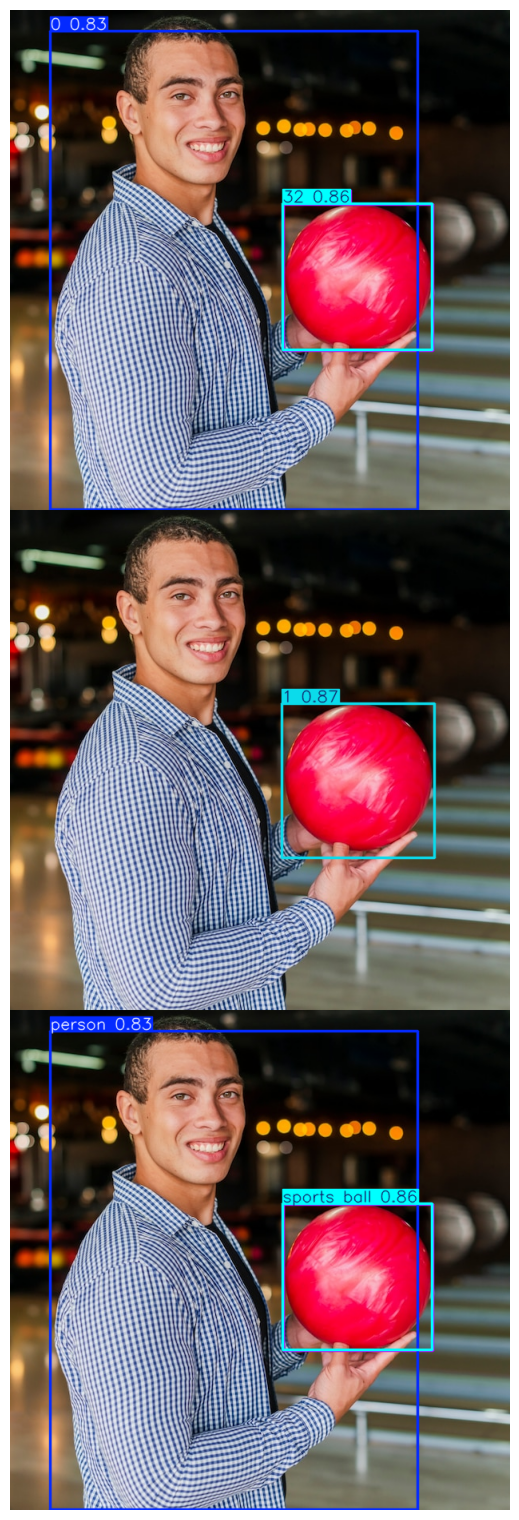

In [ ]:
show_output([result_coco.plot(), result_lp.plot(), result_merged.plot()])  # might be inaccurate, unless deployed with a modified specific code

> **NOTE**
>
> To run `merged.pt` on your own system, you need to install patched Ultralytics the same way as shown in the [beginning](#scrollTo=byoGcpV5j-Eo) of the notebook. Alternatively, you can export the model to a different format like ONNX which can then be loaded with official Ultralytics without patching.

In [ ]:
# Export to ONNX
!pip install onnxscript
model_2.export(format="onnx", imgsz=320, opset=12, dynamic=False, simplify=False, nms=True)

Ultralytics 8.3.28 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'merged.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 166, 4200) (8.0 MB)

ONNX: starting export with onnx 1.20.0 opset 12...


W1207 14:44:43.977000 1462 torch/onnx/_internal/exporter/_compat.py:114] Setting ONNX exporter to use operator set version 18 because the requested opset_version 12 is a lower version than we have implementations for. Automatic version conversion will be performed, which may not be successful at converting to the requested version. If version conversion is unsuccessful, the opset version of the exported model will be kept at 18. Please consider setting opset_version >=18 to leverage latest ONNX features
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter/__init__.py", line 127, in call
    converted_proto = _c_api_utils.call_onnx_api(
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter/_c_api_utils.py", line 65, in call_onnx_api
    result = func(proto)
             ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/onnxscript/version_converter

Applied 8 of general pattern rewrite rules.
ONNX: export success ✅ 3.8s, saved as 'merged.onnx' (18.7 MB)

Export complete (4.1s)
Results saved to /content/ultralytics
Predict:         yolo predict task=detect model=merged.onnx imgsz=320  
Validate:        yolo val task=detect model=merged.onnx imgsz=320 data=None  
Visualize:       https://netron.app


'merged.onnx'